Text(14.5, 15, 'Distribution of Clusters')

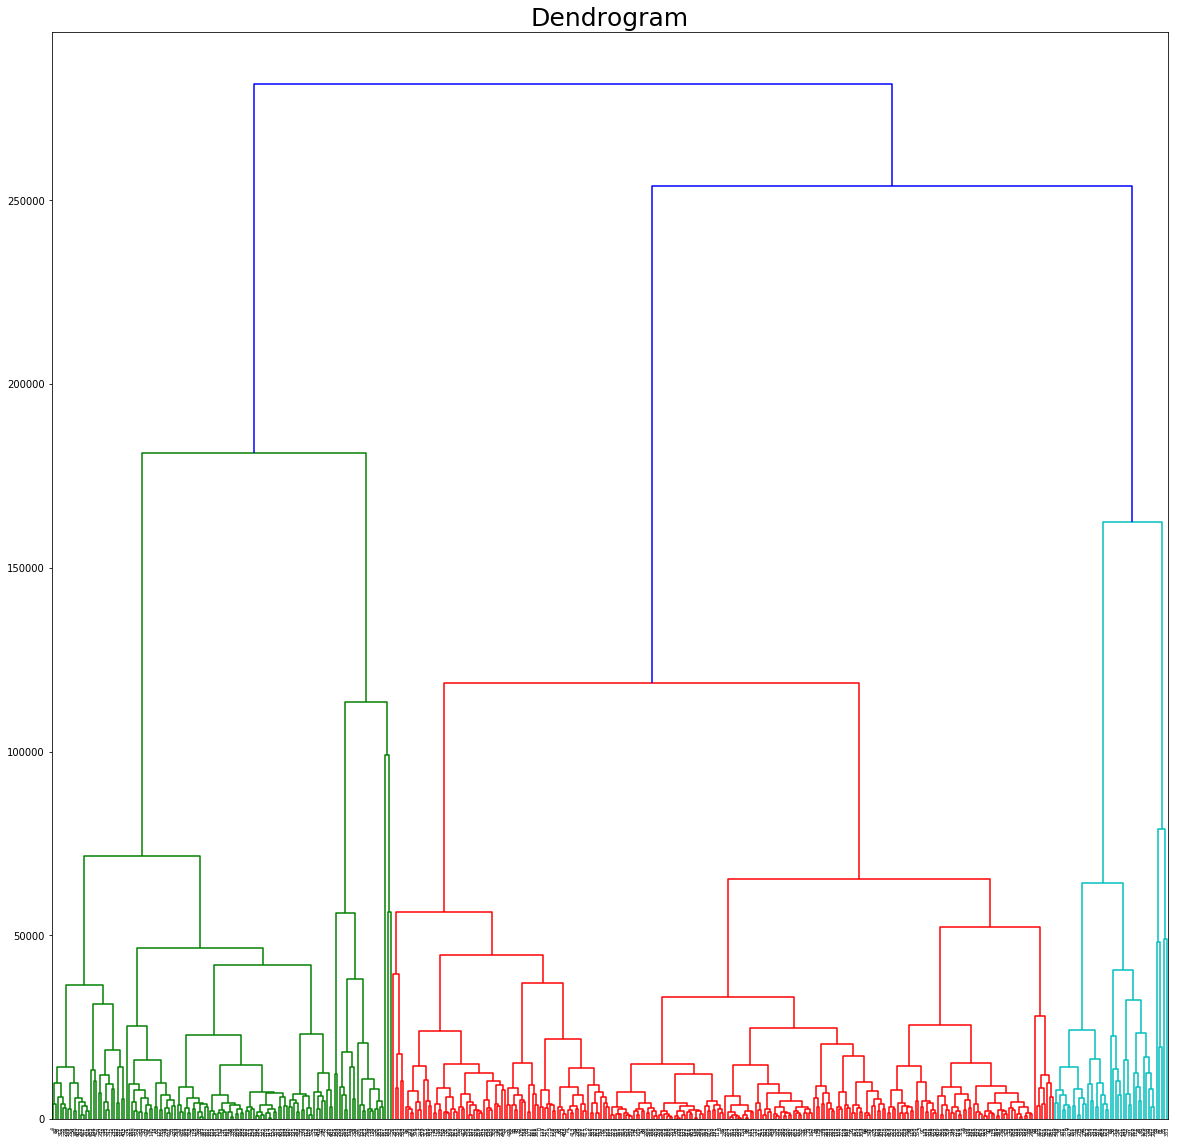

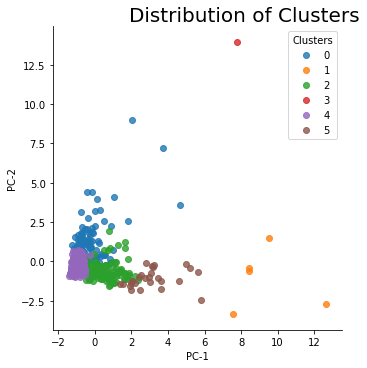

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hierarchical_clustering
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.cm as cmap
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# Importing the data, dropping trivial features
data = pd.read_csv('Wholesale_customers_data.csv')
data.drop(['Channel','Region'],axis=1,inplace=True)
column_names = data.columns

# Dendrogram :- Hierarchical Clustering
fig,axes = plt.subplots(nrows=1)
fig.set_size_inches(20,20)
plt.subplot()
plt.title('Dendrogram',size = 25)
dendrogram = hierarchical_clustering.dendrogram(hierarchical_clustering.linkage(data,method='ward'))

# normalizing the data - Z score normalization
Std_scaler = StandardScaler()
data = Std_scaler.fit_transform(data)

#Agglomerative Clustering
hierarchical_agglomerative_model = AgglomerativeClustering(n_clusters=6,affinity="euclidean",linkage='ward')
prediction = hierarchical_agglomerative_model.fit_predict(data)

#Applying PCA to find out the two principal features for ease of visual representation
pca = PCA(2)
principal_columns = pca.fit_transform(data)

# Scatter plot using Seaborn
Dataframe = pd.DataFrame({'PC-1':principal_columns[:,0],'PC-2':principal_columns[:,1],'Clusters':prediction})
pad = 14.5 #define padding -- higher numbers will move title rightward
sep = 0.3  #define separation between cluster labels
y = 15     #define y position of title
facet = sns.lmplot(data=Dataframe, x='PC-1', y='PC-2', hue='Clusters',fit_reg=False, legend=True, legend_out=False)
facet.ax.text(pad,y,'Distribution of Clusters',ha='right', va='bottom', color='black',size=20)